# Task 4.9_Part 2: Intro to Data Visualization with Python

##### By Claudia Lan Yee Chiu

### 1. Import the necessary analysis and visualization libraries, then import your most up-to-date project data

##### Importing analysis and visualization libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Import data set from Task 4.9_Part 1: ords_prods_customer_merged as a dataframe

In [3]:
# Assign path
path = r'C:\Users\clany\OneDrive\Documents\CareerFoundry\Chap_4_Pythons Fundamentals for Data Analysts\Instacart Basket Analysis'

In [4]:
# Importing ords_prods_customer_merged pkl from 4.9 Part 1
df_ords_prods_customer_merged = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'ords_prods_customer_merge.pkl'))

### 2. If you haven’t done so already, follow the instructions in the exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

#### See separate notebook: 4.9 Intro to Visualizations with Python_CLYC

### 3. Provide the Instacart senior stakeholders with descriptive findings about sales: Create a histogram of the “order_hour_of_day” column.

Text(0, 0.5, 'Frequency')

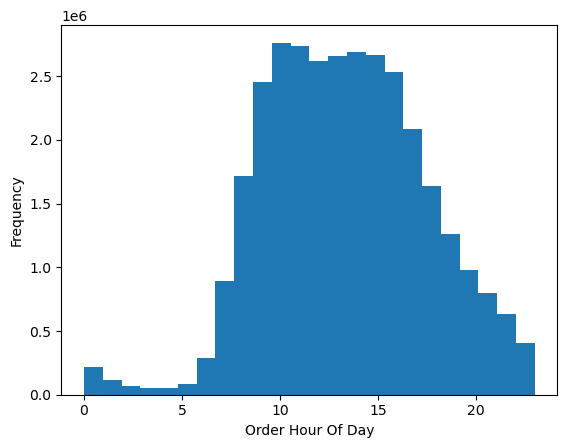

In [5]:
# Create a histogram for ´order_hour_of_day´

hist_order_hour_of_day = df_ords_prods_customer_merged['order_hour_of_day'].plot.hist(bins = 24)
plt.xlabel("Order Hour Of Day", fontsize=10)
plt.ylabel("Frequency",fontsize=10)

##### The histogram demonstrates that the orders slowly start at about 8a.m. to reach peak time of orders submitted by customers as of 10a.m until 4p.m. The frequency of orders then slowly reduces at until 11p.m.

In [8]:
# Exporting the visual
hist_order_hour_of_day.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

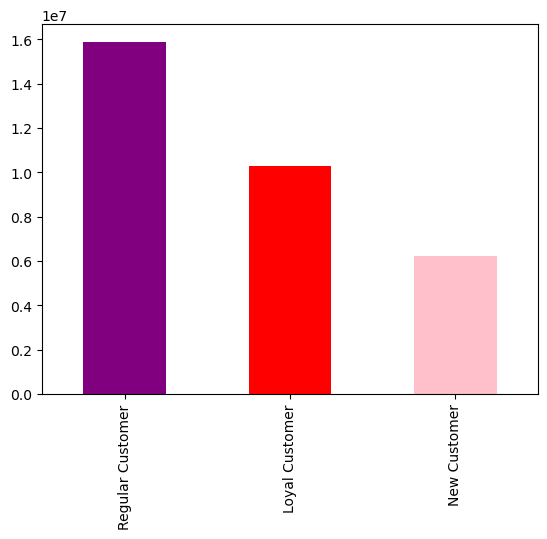

In [6]:
# Creating a loyalty_flag bar chart

bar_loyalty = df_ords_prods_customer_merged['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [7]:
# Export the visualization 
bar_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyalty_flag_customer_orders.png'))

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# Making a sample data

np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_customer_merged)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [17]:
# Storing 70% of the sample in the df ´big´

big = df_ords_prods_customer_merged[dev]

In [16]:
# Storing 30% of the sample in the df small

small = df_ords_prods_customer_merged[~dev]

In [19]:
# Counting the original dataframe
len(df_ords_prods_customer_merged)

32404859

In [20]:
# Counting the big and small to see if matches original
len(big) + len(small)

32404859

In [21]:
# Creating a subset only containing only the required columns 'prices' and 'order hour of day'

df_3 = small[['prices', 'order_hour_of_day']]

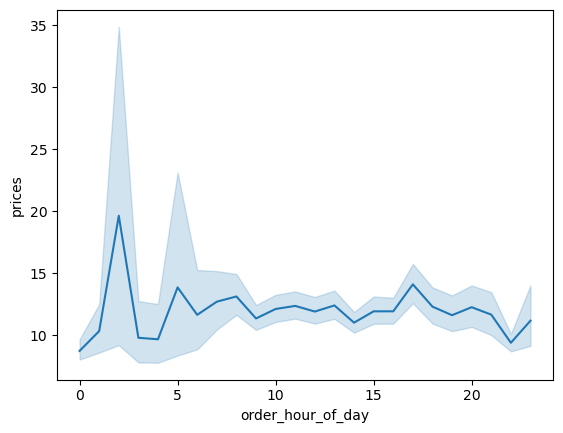

In [22]:
# Creating line chart to see the difference in expenditure

line_hour_price = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

##### There is no significant correlation between the prices and hour of the day seen here

#### 6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [24]:
# Checking the column names of the df
df_ords_prods_customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   number_of_orders        int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merge                  category
 15   price_range_loc        object  
 16  price_range_loc         float64 
 17  busiest_day             object  
 18  Busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

Text(0.5, 1.0, 'Users by Marital Status')

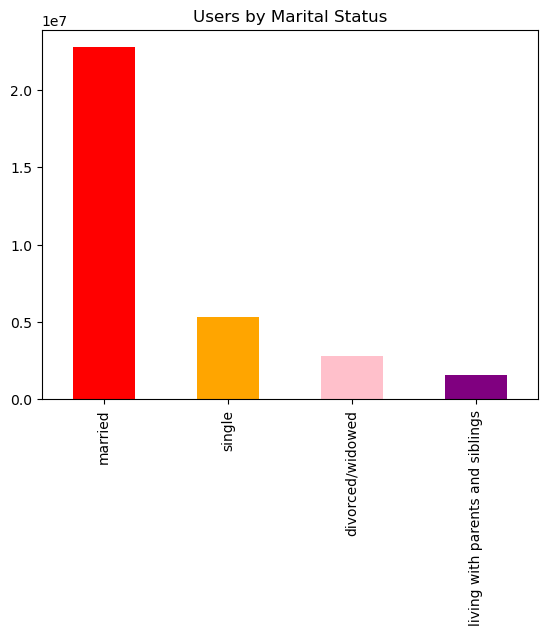

In [28]:
# Finding the details of marital status via a bar chart
bar_marital = df_ords_prods_customer_merged['family_status'].value_counts().plot.bar(color = ['red', 'orange', 'pink', 'purple'])
plt.title('Users by Marital Status', fontsize=12)

##### Married users make the most orders on Instacart

In [29]:
# Export the visualization
bar_marital.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_marital_status.png'))

In [30]:
# Creating a subset of 'number_of_dependants' and 'age'
df_4 = small[['number_of_dependants', 'age']]

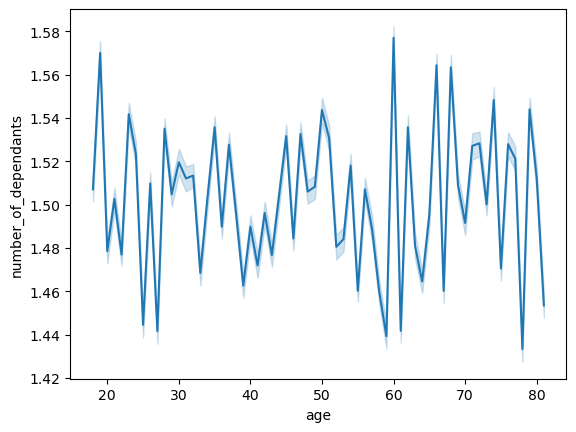

In [31]:
# Creating a line chart to compare the age with the number of dependants
line_dependants_age = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

In [34]:
# Exporting the visualization 
line_dependants_age.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_vs_number_of_dependants.png'))

#### There is no connection seen in the above line chart in regard to age and number of dependants

### 7. Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function

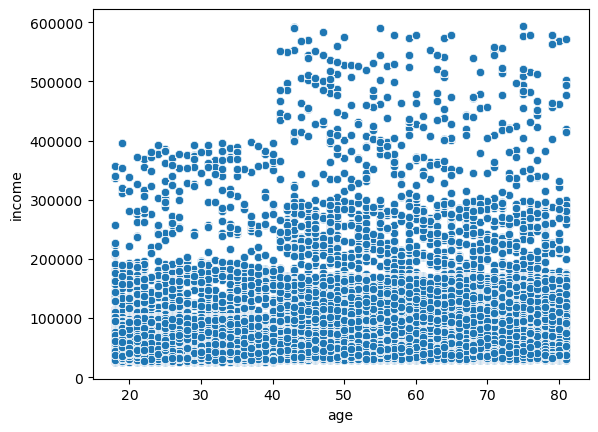

In [32]:
# Creating a scatterplot of age and income

scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_customer_merged)

In [33]:
# Exporting the visualization 
scatter_age_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_scatter_plot.png'))

##### The scatterplot shows that customers of age 40 and above, earn an average of 100000 to 200000 more than the ones aged below 40. 